# Analysis of Ambiental Radioactivity by Matt Green
In this notebook, we analyse the events contained in the root files by Matt Green about ambiental radioactivity. He said that they simulated the full **232Th-chain, 238U-chain and 40K-chain**.

## First file: `A228_Z90` (*i.e Thorium's decay chain*)
Explaination of the name: A=228, Z=90 is **228Th**, an isotope of Thorium. Then, this file containes the simulation of the full decay-chain of Thorium.

First, we look for the atoms involved in this simulation.

In [2]:
import pandas as pd
import os

# Since input file is large, we have to distribute the workload
filepath1 = os.path.join("..", "Data", "output_AmbRad_A228_Z90_100000_part1.csv")
filepath2 = os.path.join("..", "Data", "output_AmbRad_A228_Z90_100000_part2.csv")
filepath3 = os.path.join("..", "Data", "output_AmbRad_A228_Z90_100000_part3.csv")
filepath4 = os.path.join("..", "Data", "output_AmbRad_A228_Z90_100000_part4.csv")
# create multiple dataframes
df1 = pd.read_csv(filepath1, index_col=False)
df2 = pd.read_csv(filepath2, index_col=False)
df3 = pd.read_csv(filepath3, index_col=False)
df4 = pd.read_csv(filepath4, index_col=False)
# concatenate the dfs in a single one and force the mem release
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
del df1
del df2
del df3
del df4
df.head()

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,parentnucleusPID
0,1000902280,0,0.000000,0.000000,0.000000e+00,-190.082,-3.79929,31.5809,0.000000,0.000000,-0.000000,0,1,primaryParticle,666
1,1000020040,2,0.000000,3.208800,3.594670e-04,-190.086,-3.80098,31.5845,-122.561000,-37.971500,86.418100,0,5,RadioactiveDecay,666
2,1000020040,2,3.208800,0.000000,2.197580e-03,-190.104,-3.80659,31.5973,-0.000000,-0.000000,0.000000,0,5,ionIoni,666
3,22,10,0.000000,0.300089,2.809210e+13,-190.050,-3.66345,31.5127,0.060967,0.262583,-0.131857,0,14,RadioactiveDecay,666
4,22,10,0.003178,0.246502,2.809210e+13,-187.493,7.35200,25.9812,-0.092471,0.099071,-0.205906,0,14,compt,666


In [3]:
print(sorted(df.PID.unique()))

[-11, 11, 22, 1000020040, 1000180360, 1000180380, 1000180400, 1000320740, 1000320760, 1000902280]


These are:
- `PID=-11` positrons
- `PID=11` electrons
- `PID=22` photons
- `PID=1000020040` Helium isotope 4He
- `PID=1000180360` Argon isotope 36Ar
- `PID=1000180380` Argon isotope 38Ar
- `PID=1000180400` Argon isotope 40Ar
- `PID=1000320740` Germanium isotope 74Ge
- `PID=1000320760` Germanium isotope 76Ge
- `PID=1000902290` Thorium isotope 229Th

There is something weird:
1. Why there is no 232Th? Why there is 229Th if in the 232Th-chain it is not reported?
1. Why there are no the elements involed in 232Th-chain (*e.g. Ra, Ac, Rn, Po, Pb, Bi, Tl*)?

Now, we observe the energy depositions.

In [4]:
edep_entries = df[df.energydeposition>0].energydeposition.reset_index()
edep_gby_event = df.groupby("eventnumber").energydeposition.sum().reset_index()
edep_gby_event.columns = ['eventnumber', 'cum_edep']    # to distinguish

print(edep_entries.energydeposition.describe())
print()
print(edep_gby_event.cum_edep.describe())

count    1.006648e+07
mean     3.360898e-02
std      2.358649e-01
min      2.077170e-10
25%      2.488150e-03
50%      1.371690e-02
75%      2.465830e-02
max      6.605850e+00
Name: energydeposition, dtype: float64

count    99293.000000
mean         3.407331
std          3.940104
min          0.000818
25%          0.965960
50%          1.968218
75%          4.200668
max         34.748797
Name: cum_edep, dtype: float64


The deposited energy is very low, in the order of few keV.

**[TODO]** Check the units used in MC out scheme (Edep is keV? Time is ns?).

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 30})

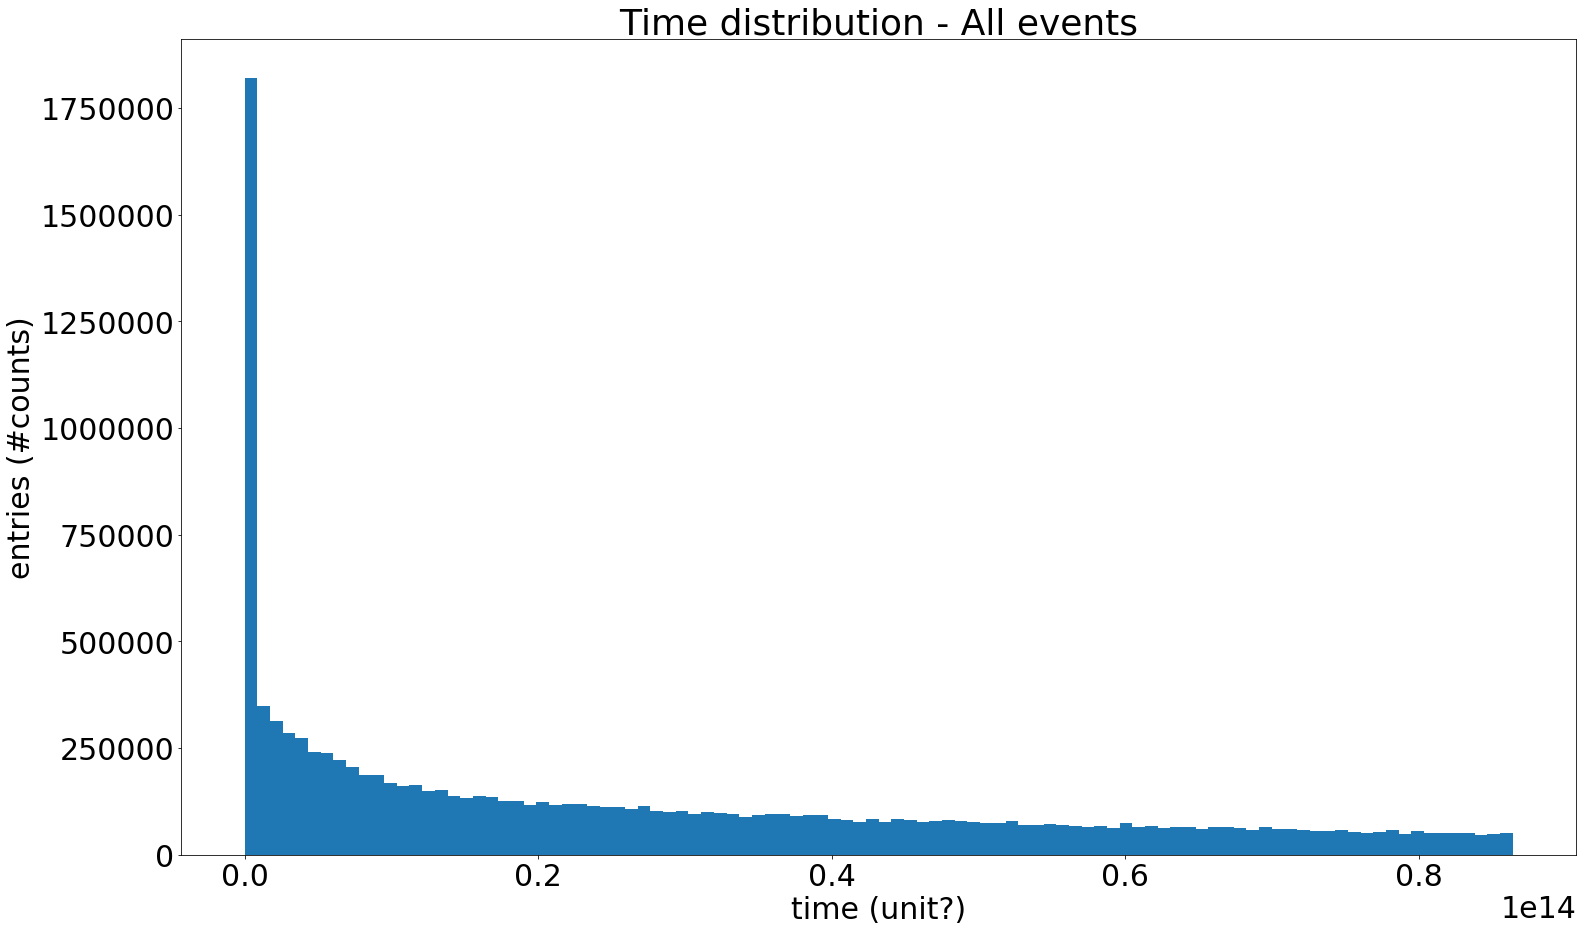

In [15]:
fig, ax = plt.subplots()
ax.hist(df.time, 100)
ax.set_title("Time distribution - All events")
ax.set_xlabel("time (unit?)")
ax.set_ylabel("entries (#counts)")
plt.show()

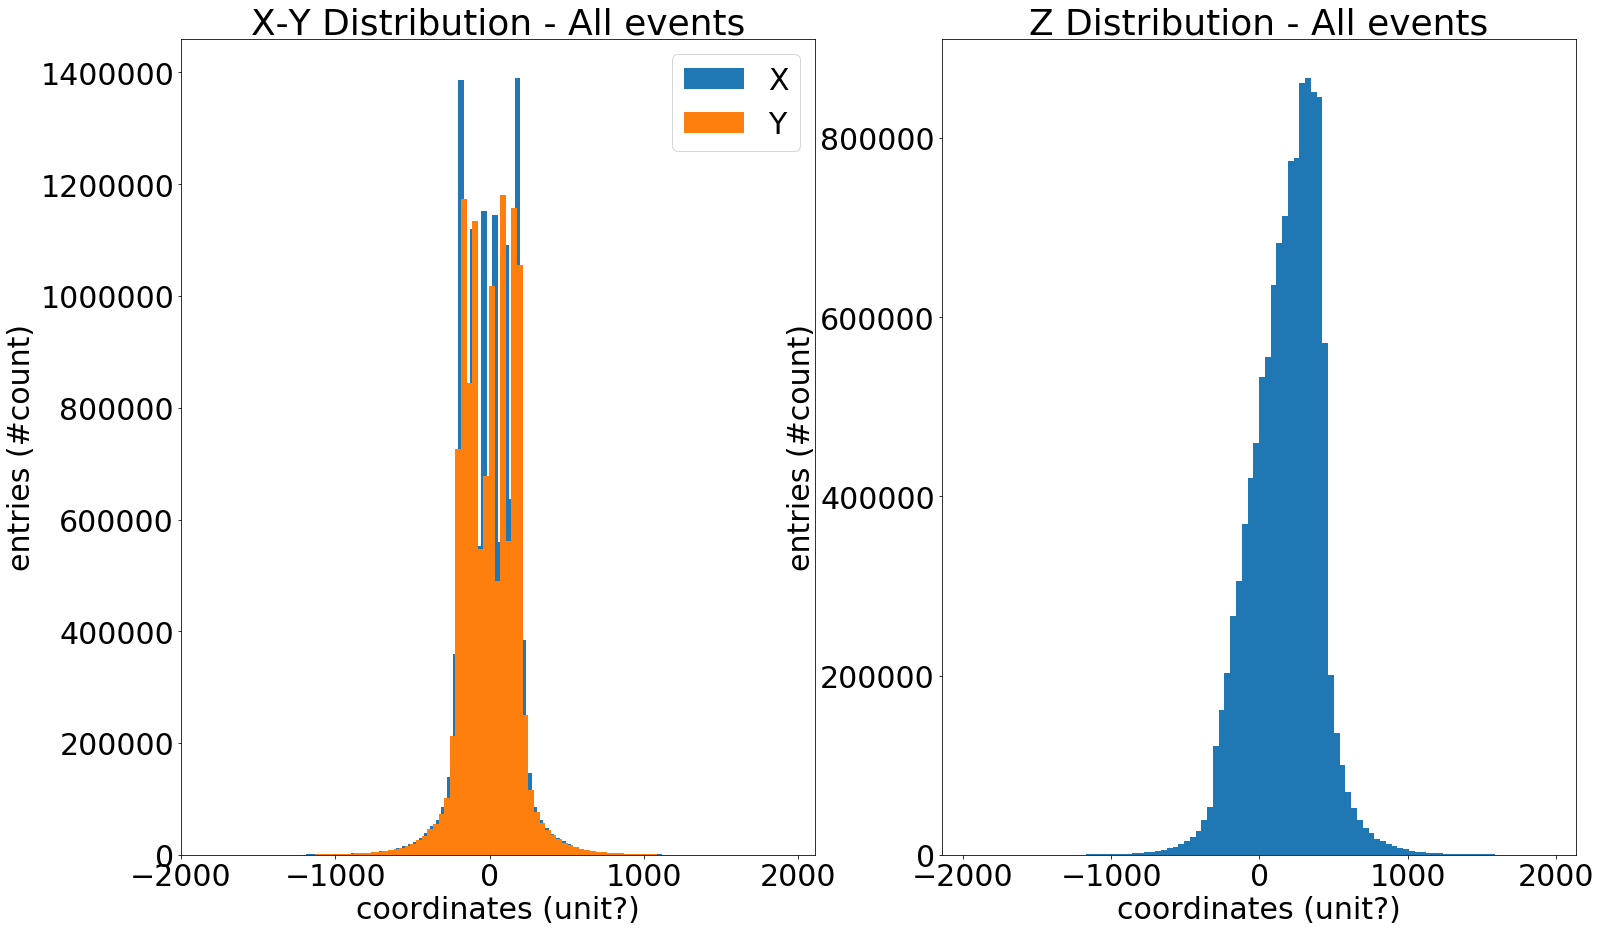

                  x             y             z
count  1.193704e+07  1.193704e+07  1.193704e+07
mean  -8.071644e-01 -3.935981e-01  1.832434e+02
std    1.783466e+02  1.772512e+02  2.343580e+02
min   -1.812850e+03 -1.712510e+03 -1.946400e+03
25%   -1.259370e+02 -1.397600e+02  3.146095e+01
50%   -1.618870e+00 -3.889120e-02  2.084190e+02
75%    1.247930e+02  1.383400e+02  3.487020e+02
max    1.846820e+03  1.923000e+03  1.941420e+03


In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2)
nbins = 100
ax1.hist(df.x, nbins, label='X')
ax1.hist(df.y, nbins, label='Y')
ax2.hist(df.z, nbins, label='Z')
ax1.set_title("X-Y Distribution - All events")
ax2.set_title("Z Distribution - All events")
ax1.set_xlabel("coordinates (unit?)")
ax2.set_xlabel("coordinates (unit?)")
ax1.set_ylabel("entries (#count)")
ax2.set_ylabel("entries (#count)")
ax1.legend()
plt.show()

print(df[["x", "y", "z"]].describe())

#### Observations:
- The space distribution ranges in the whole LAr volume (*x, y, z in ~[-1950, +1950]*).


**Question:** the sampling x, y, z is *uniform*? because we can see a greater focus around the origin. Maybe sensitive area definition lead to write only entries around the ROI?

### Single event plot
Now, we observe a single event to understand the time and space distribution.

In [40]:
eventnumber = 666
event = df[df.eventnumber==eventnumber].sort_values("time")

[Info]	Load file ../Data/output_AmbRad_A228_Z90_100000_part1.csv
[Info]	Event 666 loaded.	Num entries: 129
[Info]	Found particles: [11, 22, 1000902280]
	Plot particles: [11, 22]


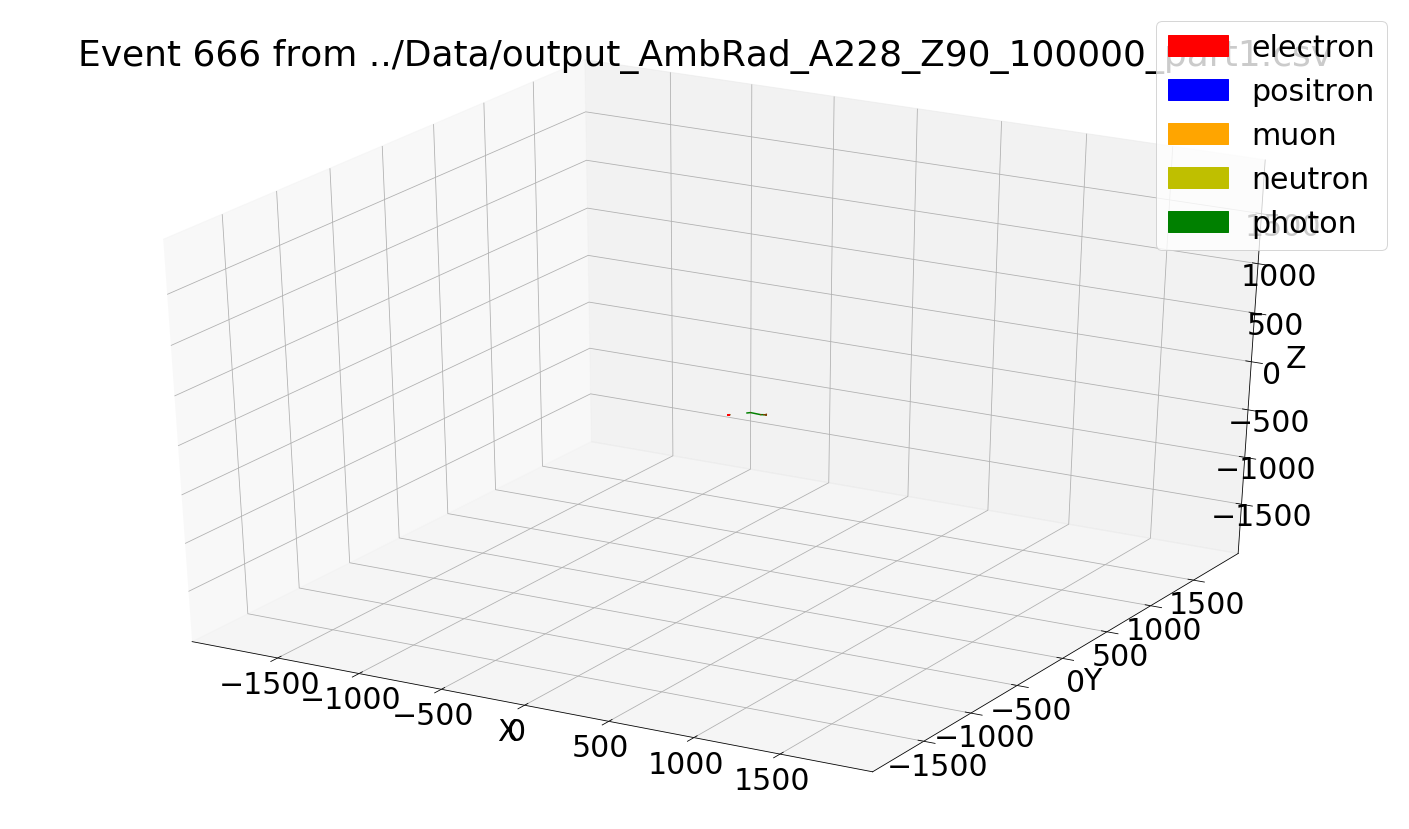

[Info] End.


In [55]:
%run -i ../Development/plot_event.py 666 --infile ../Data/output_AmbRad_A228_Z90_100000_part1.csv

## Second file: `A228_Z92` (*i.e Thorium's decay chain*)
Explaination of the name: A=228, Z=90 is **228Th**, an isotope of Thorium. Then, this file containes the simulation of the full decay-chain of Thorium.

First, we look for the atoms involved in this simulation.